In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("house_data.csv")
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [5]:
df.select_dtypes(include='object').columns


Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [6]:
df = df.drop(columns=df.select_dtypes(include='object').columns)


In [7]:
df.select_dtypes(include='object').columns


Index([], dtype='object')

In [8]:
X = df.drop('price', axis=1)
y = df['price']


In [9]:
X.dtypes


bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
dtype: object

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)


In [12]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [14]:
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Decision Tree MSE:", dt_mse)
print("Decision Tree R²:", dt_r2)

print("Random Forest MSE:", rf_mse)
print("Random Forest R²:", rf_r2)


Decision Tree MSE: 1052121827350.4335
Decision Tree R²: -0.03164740215739448
Random Forest MSE: 991798273396.5471
Random Forest R²: 0.02750224772882548


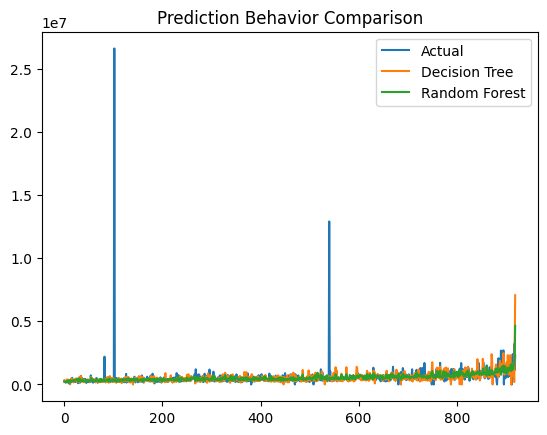

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Sort test data by sqft_living for visualization
sorted_idx = X_test['sqft_living'].argsort()

X_sorted = X_test.iloc[sorted_idx]
y_sorted = y_test.iloc[sorted_idx]

dt_sorted_pred = dt_model.predict(X_sorted)
rf_sorted_pred = rf_model.predict(X_sorted)

plt.figure()
plt.plot(y_sorted.values, label="Actual")
plt.plot(dt_sorted_pred, label="Decision Tree")
plt.plot(rf_sorted_pred, label="Random Forest")
plt.legend()
plt.title("Prediction Behavior Comparison")
plt.show()

In [16]:
# Take one test sample
sample = X_test.iloc[[0]]

# Slightly change sqft_living
sample_modified = sample.copy()
sample_modified['sqft_living'] += 10  # small change

print("Decision Tree Prediction (Original):",
      dt_model.predict(sample)[0])
print("Decision Tree Prediction (Modified):",
      dt_model.predict(sample_modified)[0])

print("\nRandom Forest Prediction (Original):",
      rf_model.predict(sample)[0])
print("Random Forest Prediction (Modified):",
      rf_model.predict(sample_modified)[0])

Decision Tree Prediction (Original): 337000.0
Decision Tree Prediction (Modified): 300000.0

Random Forest Prediction (Original): 407889.283333335
Random Forest Prediction (Modified): 411826.988333335


In [17]:
# Add random noise to test data
X_test_noisy = X_test.copy()
X_test_noisy['sqft_living'] += np.random.normal(0, 20, size=len(X_test))

dt_noisy_pred = dt_model.predict(X_test_noisy)
rf_noisy_pred = rf_model.predict(X_test_noisy)

print("Decision Tree MSE with noise:",
      mean_squared_error(y_test, dt_noisy_pred))

print("Random Forest MSE with noise:",
      mean_squared_error(y_test, rf_noisy_pred))

Decision Tree MSE with noise: 1049239295232.1205
Random Forest MSE with noise: 990005487366.6278
